### Load the libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Import the dataset 

In [2]:
data = pd.read_csv("Country+clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


We see that the dataset has 5 countries, with their respective latitudes, longitudes, and lanuage. Let's now plot the dataset as a scatterplot. 

### Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

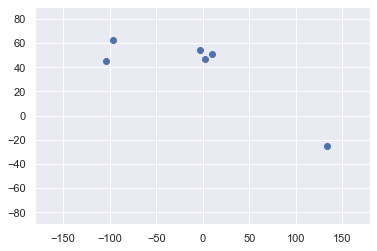

In [3]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

We wanted our data to resemble a map, and so we set the axes to reflect the natural domain of latitude and longitude. If we place an actual map next to this one, we can see the resemblance. 

### Select the features

We will start clustering based on location. Our inputs will be contained in a variable called X. X will contain the latitudes and longitudes. We will use the iloc method from pandas. iloc is a method which slices a dataframe; the first argument indicates the row indices, and the second argument, the column indices. 

In [4]:
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


We now sliced the first and second column out of the dataframe(Country column has an index of 0). Next, we will declare a variable called kmeans.

### Clustering

In [5]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

We have performed clustering using the KMeans method that we imported, where 2 indicates the number of clusters we need. Just like in regression, we need to fit the model using .fit . 

### Clustering results

We can obtain the predicted clusters for each observation using the fit predict method. We will now declare a new variable called identified_clusters. 

In [6]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 0])

We see that the first 5 observations are in the same cluster 0, while the last one is in cluster 1. Let's create a datadrame to see things more clearly. We will add a column called Cluster to this dataframe. 

In [7]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


We see that the countries USA, Canada, France, UK, and Germany are in Cluster 0, while Australia stands alone in Cluster 1. Let's plot all this on a scatterplot. 

<function matplotlib.pyplot.show(close=None, block=None)>

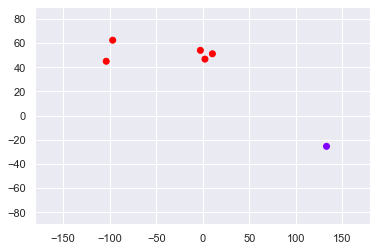

In [8]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

That is how K-Means clustering is performed. If we want to have 3 clusters, we would need to go back to the line where we specified the number of clusters and change it from 2 to 3. Let's now make use of the other column in the dataset- "Language". We will use numerical variables to encode the strings to numbers. 

### Map the data

In [11]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French': 1, 'German': 2})
data_mapped                                                    

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the features

In [14]:
x = data_mapped.iloc[:,3:]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


Now we can perform clustering. Let's run kmeans clustering with 3 clusters here. 

In [15]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [16]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 0, 1, 0])

In [18]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

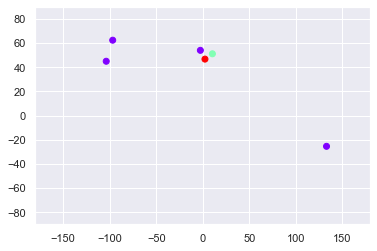

In [19]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c = data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

The plot is unequivocal. The three clusters are USA, Canada, UK, and Australia in the first one, France in the second, and Germany in the third, as expected. 